Testing for Bliss independence in the presence of the control group:
T-stat=,1.691,y1+y2-y3-y0=,0.503, exp(y1+y2-y3-y0)=1.653, p-value=,0.129
[0.39788928 8.         1.33333333 1.69054248]


/var/folders/gr/8rgs7fbd40z3t8yttyn7xc5w0000gn/T/ipykernel_4278/117514205.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lCA, lCB, lCD, indep], labels=namgr, showmeans=True)


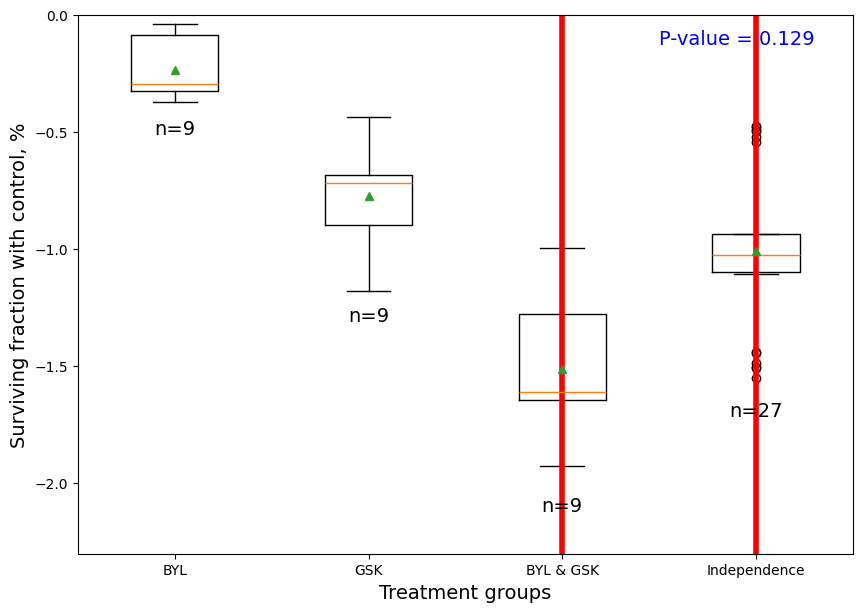

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

d = pd.read_csv("ZR75.csv")
namgr = ["BYL", "GSK", "BYL & GSK", "Independence"]
tr = d.iloc[:, 0]

C = d[tr == "C"].iloc[:, 1].values
A = d[tr == "A"].iloc[:, 1].values
B = d[tr == "B"].iloc[:, 1].values
AB = d[tr == "AB"].iloc[:, 1].values

n0, n1, n2, n3 = len(C), len(A), len(B), len(AB)

lC, lA, lB, lAB = np.log(C), np.log(A), np.log(B), np.log(AB)
y0, y1, y2, y3 = np.mean(lC), np.mean(lA), np.mean(lB), np.mean(lAB)

s0 = np.var(lC, ddof=1)*(n0-1)
s1 = np.var(lA, ddof=1)*(n1-1)
s2 = np.var(lB, ddof=1)*(n2-1)
s3 = np.var(lAB, ddof=1)*(n3-1)

sy = s0 + s1 + s2 + s3
dft = n0 + n1 + n2 + n3 - 4
denf = (1/n0) + (1/n1) + (1/n2) + (1/n3)

tss = (y1 + y2 - y3 - y0) / np.sqrt(sy / dft) / denf
pv = 2 * (1 - stats.t.cdf(abs(tss), df=dft))
pvP = 1 - stats.t.cdf(tss, df=dft)  # One-sided p-value

print("Testing for Bliss independence in the presence of the control group:")
print(f"T-stat=,{round(tss,3)},y1+y2-y3-y0=,{round(y1+y2-y3-y0,3)}, "
    f"exp(y1+y2-y3-y0)={round(np.exp(y1+y2-y3-y0),3)}, p-value=,{round(pv,3)}")
print(np.array([sy, dft, denf, tss]))

indep = np.zeros(n1 * n2 * n0)
k = 0
for i in range(n1):
    for j in range(n2):
        for l in range(n0):
            indep[k] = lA[i] + lB[j] - 2 * lC[l]
            k += 1

lCA = np.zeros(n0 * n1)
lCB = np.zeros(n0 * n2)
lCD = np.zeros(n0 * n3)

k = 0
for i in range(n0):
    for j in range(n1):
        lCA[k] = lA[j] - lC[i]
        k += 1

k = 0
for i in range(n0):
    for j in range(n2):
        lCB[k] = lB[j] - lC[i]
        k += 1

k = 0
for i in range(n0):
    for j in range(n3):
        lCD[k] = lAB[j] - lC[i]
        k += 1

plt.figure(figsize=(10, 7))
y1 = np.array([0.1, 0.2, 0.4, 0.7, 1])
lyl = np.log(y1)
plt.boxplot([lCA, lCB, lCD, indep], labels=namgr, showmeans=True)
plt.ylabel("Surviving fraction with control, %", fontsize=14)
plt.xlabel("Treatment groups", fontsize=14)
plt.ylim(np.min(lyl), np.max(lyl))
plt.axvline(x=3, color='r', lw=4)
plt.axvline(x=4, color='r', lw=4)
plt.text(3.5, np.log(0.88), f"P-value = {round(pv, 3)}", fontsize=14, color="blue")
yn = np.log(np.array([60, 27, 12, 18]) / 100)
for i in range(4):
    if i == 0:
        n_val = n1 * n0
    elif i == 1:
        n_val = n2 * n0
    elif i == 2:
        n_val = n3 * n0
    else:
        n_val = n0 * n1 * n2
    plt.text(i + 1, yn[i], f"n={n_val}", fontsize=14, ha='center')
plt.show()

In [18]:
d

,Treatment,SF
0,C,0.82927
1,C,1.06620
2,C,1.10105
3,A,0.75958
4,A,0.79443
5,A,0.79791
6,B,0.33798
7,B,0.53659
8,B,0.52613
9,AB,0.16028
